In [14]:
# Prelude
import ralphlib
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


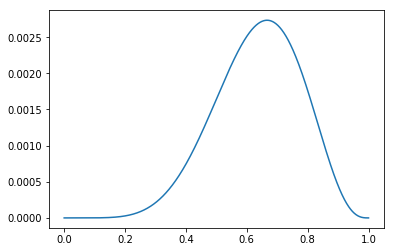

In [68]:
# 3E1
def world_toss_likelihood(num_water, num_tries):
    return lambda grid: stats.binom.pmf(num_water, num_tries, grid)

grid = np.linspace(start=0, stop=1, num=1000)
posterior = pd.Series(
    data=ralphlib.grid_approx(
        ralphlib.uniform_prior,
        world_toss_likelihood(6, 9),
        grid
    ),
    index=grid
)
posterior.plot()

In [55]:
posterior[posterior.index >= 0.2].sum()

0.9991439048705782

(array([1.88000e+02, 3.30700e+03, 1.98800e+04, 6.32650e+04, 1.35321e+05,
        2.14647e+05, 2.47296e+05, 2.05541e+05, 9.71130e+04, 1.34420e+04]),
 array([0.06606607, 0.15855856, 0.25105105, 0.34354354, 0.43603604,
        0.52852853, 0.62102102, 0.71351351, 0.80600601, 0.8984985 ,
        0.99099099]),
 <a list of 10 Patch objects>)

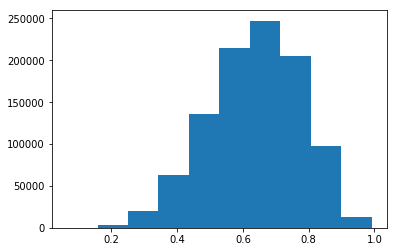

In [88]:
sample_size = 1000000
sample = ralphlib.sample(posterior, sample_size)
plt.hist(sample)

In [97]:
param_values, counts = np.unique(sample, return_counts=True)
sample_freq = pd.Series(
    index=param_values,
    data=counts / sample_size
)

In [100]:
# 3E1
# Note: we are working with frequencies here! 
sample_freq[sample_freq.index < 0.2].sum()

0.0008320000000000001

In [144]:
# 3E2
sample_freq[sample_freq.index > 0.8].sum()

0.12095500000000001

In [110]:
# 3E3
sample_freq[(sample_freq.index > 0.2) & (sample_freq.index < 0.8)].sum()

0.878213

In [141]:
# 2E4
# Note: we are working directly with samples here!
quantile0_2 = np.quantile(sample, 0.2)
quantile0_2

0.5165165165165165

In [143]:
sample_freq[sample_freq.index <= quantile0_2].sum()

0.201505

In [151]:
# 2E5
quantile0_8 = np.quantile(sample, 0.8)
quantile0_8

0.7607607607607607

In [154]:
sample_freq[sample_freq.index > quantile0_8].sum()

0.19896999999999998

In [172]:
# 3E6
sample_freq_cumsum = sample_freq.cumsum()
cumsum0_66 = sample_freq_cumsum + 0.66
cumsum0_66 = cumsum0_66[cumsum0_66 <= 1.0]
q_series = cumsum0_66.apply(lambda q: np.quantile(sample, q))

In [176]:
fin_series = pd.Series(
    data=(q_series.values - q_series.index),
    index=q_series
)

In [212]:
fin_df = pd.DataFrame(
    data={
        "rhs": q_series.values,
        "width": q_series.values - q_series.index
    },
    index=q_series.index
)
# interval of density 66% with minimum width
lhs = fin_df["width"].idxmin()
hpdi_interval = (lhs, fin_df["rhs"][lhs])
hpdi_interval

(0.5105105105105106, 0.7847847847847848)

In [213]:
# 3E7
outside_half_density = (1-0.66)/2
eq_lhs = np.quantile(sample, outside_half_density)
eq_rhs = np.quantile(sample, 1 - outside_half_density)
symmetric_interval = (eq_lhs, eq_rhs)

In [214]:
# bonus: what is the value of p with maximal density?
sample_freq.idxmax()

0.6526526526526526

In [216]:
# bonus: widths of the two intervals
symmetric_width = symmetric_interval[1] - symmetric_interval[0]
hpdi_width = hpdi_interval[1] - hpdi_interval[0]
(symmetric_width, hpdi_width)

(0.27627627627627627, 0.2742742742742742)